" Python을 이용한 서울시 행정구별 ‘커피지수’ 연구 "(스타벅스와 엔젤리너스를 중심으로)
=======================
 by 빅데이터전공 하은겸    
* **서울특별시 행정구별 '스타벅스' , '엔제리너스' 사이트에서 매장 정보 가져오기**
* **스타벅스 vs 엔제리너스**
* **특정 행정구의 인구수 별 매장 비율 비교해보기**
* **스타벅스 매장 개수 엔제리너스 매장 개수 가져오기**      
___
**_'닐슨 코리아가 실시한 '한국인의 커피 소비에 대한 인식 조사'에 따르면 한국인은 일주일에 평균 9.31잔의 커피를 마신다. 하루에 1.3잔은 꼭 커피를 마시는 셈이다 '_            
_'관세청에 따르면 지난해 국내 커피시장 규모는 11조7397억원으로 12조 돌파는 눈 앞에 두고 있다. 이는 10년 전인 2007년 3조 원대비 4배 가량 증가한 규모다. 전 세계 원두 수입량은 지난해 7위를 기록해 일본(2위)과 함께 순위권 안에 든 아시아 국가로 꼽혔다.'_**       

---
위에 내용 처럼 한국의 커피 시장은 매년 커지고 있습니다. 이러한 한국 커피시장 1등 브랜드인 '스타벅스'와 스타벅스를 이 따르는 '엔제리너스'의 서울시 행정구별 매장 특징에 대해 알아 보겠습니다!  또한 서울시 인구수 데이터와 함께 그래프를 만들어 보겠습니다!    

### 1) 우선 서울시 행정구별 스타벅스의 매장 개수를 가져오겠습니다! 

로컬 컴퓨터의 웹 브라우져를 컨트롤하면서      
스타벅스 웹 페이지의 정규화 된 정보를 읽기 위해       
selenium import하고 selenium의 webdriver을 import해야 합니다. 

In [91]:
import selenium
from selenium import webdriver

Chrome 브라우져를 이용해서 웹 크롤링을 진행하려면 크롬 웹드라이버가 필요합니다.   
크롬 웹드라이버를 다운로드해주세요. [chromedriver 다운로드 링크](https://chromedriver.storage.googleapis.com/index.html?path=2.43/)             
Chrome 브라우져를 이용해 '스타벅스', '엔제리너스'의 서울시 구별 매장개수를 가져올 것입니다.    

먼저 스타벅스의 정보를 가져오겠습니다.   
__(check!) Chrome 빈 창이 뜨는지 확인하기!__

In [94]:
# 크롬 브라우저 실행됩니다. chromdriver.exe 파일 주소 넣기 
web = webdriver.Chrome(r'C:\Users\Samsung\Downloads\chromedriver_win32\chromedriver.exe') 

이제 브라우저를 띄웠으니 브라우저를 조작하고 원하는 부분의 데이터만 가져오겠습니다.      
사이트를 이동하기 위해서는 get 메서드를 이용합니다.  

get 함수를 사용해서 스타벅스 매장찾기 사이트('http://www.istarbucks.co.kr/store/store_map.do')로 이동          
__(check!) chrome 창 변화 확인하기 ! __

In [96]:
#스타벅스 매장정보 찾기 주소 넣기
web.get('http://www.istarbucks.co.kr/store/store_map.do')

+ 스타벅스 매장 정보 사이트의 특징과 서울시 매장 정보를 가져오는 방법을 소개하겠습니다.        
예를 들어 ' 서울시 강남구' 지역의 매장 정보를 가져오기 위해서는 마우스로         
    1. '지역검색' 클릭 
    2. '서울' 클릭 
    3. '전체' 클릭  
해야 데이터를 가져올 수 있습니다. 

__(주의!) 웹화면이 변했지만 url이 바뀌지 않습니다!!!__       
웹 요소의 확인해 find_element_by_class_name() 메서드와 위에 언급한 이유로 click()을 이용해 스타벅스의 서울시 행정구별 스타벅스의 개수를 가져 오겠습니다. 

1. 웹의 '지역검색' 버튼의 소스코드 class = 'loca_search' 입니다.

In [98]:
#지역 검색 클릭
web.find_element_by_class_name('loca_search').click() 

2. '지역검색'버튼 클릭 후 '서울' 버튼의 소스코드 class= 'set_sido_cd_btn' 입니다.

In [99]:
#서울 클릭
web.find_element_by_class_name('set_sido_cd_btn').click() 

3. '지역검색' 클릭 후 '서울' 클릭 후 '서울전체' 버튼의 소스코드 class="gugun_arae_box" 입니다.

In [102]:
# 서울 전체 클릭
web.find_element_by_class_name('set_gugun_cd_btn').click()

ElementNotVisibleException: Message: element not visible
  (Session info: chrome=70.0.3538.102)
  (Driver info: chromedriver=2.41.578737 (49da6702b16031c40d63e5618de03a32ff6c197e),platform=Windows NT 10.0.17134 x86_64)


4. page_source를 이용해 web의 html를 가져옵니다.

In [105]:
web.page_source[:2001] # 너무 코드가 길어서 2000단어만 가져오겠습니다. 

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="ko"><head>\n\t\t\n\n\n\n\n\n\n\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta charset="utf-8" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" />\n<meta property="og:type" content="website" />\n<meta property="og:title" content="Starbucks" />\n<meta property="og:url" content="http://www.istarbucks.co.kr/" />\n<meta property="og:image" content="http://www.istarbucks.co.kr/common/img/kakaotalk.png" />\n<meta property="og:description" content="Starbucks" />\n\n<title id="titleJoin">Starbucks Coffee Korea</title>\n<link rel="shortcut icon" href="/common/img/common/favicon.ico" type="image/ico" />\n<link href="/common/css/reset.css" rel="stylesheet" />\n<link href="/common/css/style.css" rel="stylesheet" />\n<link href="/common/css/jquery.bxslider.css" rel="stylesheet" />\n<link href="/common/css/idangerous.swiper.css" rel="styl

---
web.page_source를 이용해 스타벅스 서울특별시 매장정보 웹 페이지를 그대로 가져왔고,    
여기서 필요한 데이터만 추출할 것입니다.            
또한 웹 소스코드의 tag의 이름을 이용해,  필요한 코드를 검색하는 기능하기 위해 bs4설치 합니다.

In [14]:
import bs4 

스타벅스의 매장정보 웹주소는 클릭을 해서 다른페이지로 넘어가도 웹주소가 바뀌지 않아서 ,아까와 같은 코드를 실행해.
최종적으로 web.page_sourse 로 웹의 정보를 가져왔습니다.  
#원래는 간편하게 예를 들어 'www.naver.com ' url을 가져오면 바로 웹의 정보를 가져 올 수 있지만, 스타벅스 매장정보 지도 url 특성상 웹 주소가 변화지 않으므로 우리가 원하는 서울시 매장정보 데이터를 가져오려면, 앞의 방법으로 웹의 정보를 가져왔습니다.

1. Beautifulsoup을 이용해 서울시 전체 스타벅스 매장 주소 데이터를 가져오겠습니다.
    + Beautifulsoup : HTML태그 등 정보를 가져온 뒤 사용자가 파싱하기 쉽게 도와주는 라이브러리


In [108]:
# html 소스를 파이썬으로 파싱해옴(불러옴)
starburks = bs4.BeautifulSoup(web.page_source,"lxml")

2. find_all() 메소드로 매장 별 모든 주소를 가져옵니다.     
웹의 주소를 가져오는 소스코드 tag ='p'이고, class='result_details' 입니다. 

In [110]:
# 주소가져오기
staraddress = starburks.find_all('p',class_ = 'result_details')

__(check!) 서울시에 있는 모든 스타벅스 매장 주소(= staraddress)를 list형태로 가져왔습니다.__ 

In [111]:
staraddress[:21] # 데이터가 너무 많아서 20개만 가져오겠습니다. 

[<p class="result_details">서울특별시 중구 세종대로 124 (태평로1가)<br/><a href="tel:02-722-3263">02-722-3263</a></p>,
 <p class="result_details">서울특별시 중구 무교로 21 (무교동) 코오롱빌딩 1층<br/><a href="tel:02-758-8037">02-758-8037</a></p>,
 <p class="result_details">서울특별시 중구 을지로 19, 삼성화재삼성빌딩 1층 (을지로1가)<br/><a href="tel:02-758-8504">02-758-8504</a></p>,
 <p class="result_details">서울특별시 중구 을지로 19, 삼성화재삼성빌딩 1층 (을지로1가)<br/><a href="tel:02-758-8505">02-758-8505</a></p>,
 <p class="result_details">서울특별시 중구 소공로 112 (소공동)<br/><a href="tel:02-758-8140">02-758-8140</a></p>,
 <p class="result_details">서울특별시 중구 남대문로 109 (다동)<br/><a href="tel:02-752-3464">02-752-3464</a></p>,
 <p class="result_details">서울특별시 종로구 종로 6 (서린동)<br/><a href="tel:02-733-3592">02-733-3592</a></p>,
 <p class="result_details">서울특별시 중구 세종대로18길 32 (소공동) 삼원빌딩<br/><a href="tel:02-758-8843">02-758-8843</a></p>,
 <p class="result_details">서울특별시 중구 남대문로7길 19, 삼영빌딩 1층 일부 (소공동)<br/><a href="tel:02-758-8569">02-758-8569</a></p>,
 <p class="result_details">서울특별시

---
__*staraddress의 서울시와 행정구의 텍스트만 가져오겠습니다.*__

1. 우선 staraddress의 첫 번째 인덱스의 내용을 가져옵니다.

In [112]:
staraddress[0]

<p class="result_details">서울특별시 중구 세종대로 124 (태평로1가)<br/><a href="tel:02-722-3263">02-722-3263</a></p>

2. 이어서 staraddess[0]의 text만 가져옵니다.

In [22]:
staraddress[0].text

'서울특별시 중구 세종대로 124 (태평로1가)02-722-3263'

3. staraddress[0].text 출력했을 때 ' '(띄어쓰기한칸)으로 단어가 구분되어 있는 것을 확인 할 수 있습니다.   
    + ' '(띄어쓰기) 기준으로 split 메소드를 사용하여 단어를 분리 합니다. 

In [23]:
staraddress[0].text.split(' ')

['서울특별시', '중구', '세종대로', '124', '(태평로1가)02-722-3263']

4. 이어서 staraddress[0]의 첫 번째 두 번째 index의 내용만 가져옵니다. 

In [113]:
staraddress[0].text.split(' ')[:2]

['서울특별시', '중구']

__위의 같은 방법으로 for문을 이용해 모든 staraddress의 '서울특별시 행정구' 까지 정보만 가져오는 index_num() 함수를 만들겠습니다. __

In [114]:
def index_num(a=0,b=1):
    sido = [] #시를 담을 빈list 만들고 
    gugun = [] # 구를 넣을 빈list 만들고 
    for i in staraddress: #한줄 한줄씩 
        sido.append(i.text.split(' ')[a]) # 시를 넣기 
        gugun.append(i.text.split(' ')[b]) # 구를 넣기 
    return sido,gugun

index_num()함수는 sido, gugun을 return합니다.      
sido에는 매장 수 만큼의 '서울특별시' 가 gugun에는 매장 하나하나의 '행정구 이름'이 들어갑니다.

In [115]:
sido=index_num()[0]
gugun = index_num()[1]

In [116]:
sido[:21] #데이터거 너무 많아서 20개만 출력

['서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시',
 '서울특별시']

In [117]:
gugun[:21]# 데이터가 너무 많아서 20개만 출력

['중구',
 '중구',
 '중구',
 '중구',
 '중구',
 '중구',
 '종로구',
 '중구',
 '중구',
 '중구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구']

---
___pandas 라이브러리를 실행하여 데이터를 dataframe형태로 만들어 보겠습니다.___

1. pandas 라이브러리를 실행합니다. 

In [118]:
import pandas as pd

2. dictionary를 이용해    
값 sido의 key를 '시도'로   
값 gugun의 key를 '구'로 데이터를 변경하고  
보기 예쁜 모양인 DataFrame으로 정리합니다. 

In [119]:
raw_data = pd.DataFrame({'시도':sido, '구':gugun}) #데이터 프레임으로 저장 

In [120]:
raw_data

,시도,구
0,서울특별시,중구
1,서울특별시,중구
2,서울특별시,중구
3,서울특별시,중구
4,서울특별시,중구
5,서울특별시,중구
6,서울특별시,종로구
7,서울특별시,중구
8,서울특별시,중구
9,서울특별시,중구


3. raw_data의 '구' column을 기준으로 같은 데이터의 개수를 가져옵니다.   
---> 행정구별 스타벅스매장 수를 확인할 수 있습니다.

In [121]:
 starcounts =raw_data['구'].value_counts()

In [122]:
starcounts #행정구별 스타벅스매장 개수 

강남구     72
중구      58
서초구     45
종로구     38
영등포구    33
마포구     32
송파구     28
서대문구    20
용산구     17
양천구     14
강서구     14
광진구     13
성북구     12
금천구     10
강동구     10
노원구     10
구로구     10
관악구      9
성동구      9
동대문구     9
동작구      8
은평구      8
중랑구      6
강북구      5
도봉구      1
Name: 구, dtype: int64

In [123]:
starcounts.index #index가 행정구이름이다.

Index(['강남구', '중구', '서초구', '종로구', '영등포구', '마포구', '송파구', '서대문구', '용산구', '양천구',
       '강서구', '광진구', '성북구', '금천구', '강동구', '노원구', '구로구', '관악구', '성동구', '동대문구',
       '동작구', '은평구', '중랑구', '강북구', '도봉구'],
      dtype='object')

In [55]:
starcounts.values # 각각 index의 값이 나온다. 

array([72, 58, 45, 38, 33, 32, 28, 20, 17, 14, 14, 13, 12, 10, 10, 10, 10,
        9,  9,  9,  8,  8,  6,  5,  1], dtype=int64)

4. 다시 한번, dictionary을 이용해      
값 starcounts.index의 key를 '구'로    
값 starburks.values의 key를 '스타벅스수' 로 하여     
보기 좋은 DataFrame으로 정리 합니다. 

In [124]:
 total = pd.DataFrame({'구':starcounts.index,'스타벅스수':starcounts.values})

In [125]:
total # 행정구와 스타벅스수를 확인할 수 있다. 

,구,스타벅스수
0,강남구,72
1,중구,58
2,서초구,45
3,종로구,38
4,영등포구,33
5,마포구,32
6,송파구,28
7,서대문구,20
8,용산구,17
9,양천구,14


___여기까지 서울시 행정구별  '스타벅스' 매장 수를 가져왔습니다 !___

### 2) 두 번째로 ' 서울시 행정구별 엔제리너스 매장 수' 데이터를 만들어 보겠습니다.

1. Chorme 브라우저를 새로 하나 띄우고, web2로 저장합니다.

In [126]:
web2 = webdriver.Chrome(r'C:\Users\Samsung\Downloads\chromedriver_win32\chromedriver.exe')  

2. get 메소드를 이용해 엔제리너스의 매장찾기 웹 주소로 이동합니다. 

In [127]:
web2.get('http://www.angelinus.com/Shop/Shop_List.asp')

+ 엔제리너스는 스타벅스 매장찾기와 다르게, 매장주소를 검색할 수 있는 검색창이 있는 것을 확인 할 수 있습니다.      
    + 예를 들어 검색창에 '서울 종로구'까지 입력 후 '검색' 버튼을 클릭하면, 
        '서울 종로구'의 매장 정보와 개수가 나옵니다. 

3. find_element_by_id 메소드를 이용해 검색창에 무언가 입력할 수 있는 환경을 만들어주고,     
send_keys 메소드로 예를 들어 '서울시 종로구'까지 입력합니다.     
    + 엔제리너스의 매장정보 찾기 검색창의 웹 소스코드 element의 id는 'shop' 입니다. (id = 'shop')

In [129]:
web2.find_element_by_id('shop').send_keys('서울 종로구') # 검색창에 '서울 종로구' 입력하기 

4. click() 메소드를 이용해 '검색' 버튼을 클릭하게 합니다.     
    + 여기의 웹 tag는 (id = 'btnSearch') 입니다.

In [130]:
web2.find_element_by_id('btnSearch').click() #검색 버튼 누르기 

위에 까지 click() 함수를 이용하여 '서울 종로구' 지역에 있는 모든 매장을 확인할 수 있습니다.      

여기까지의 웹 화면에서 갈색인 '번호' 컬럼을 보시면 맨 위에 있는 숫자가 그 특정 행정구의 매장 개수를 뜻 하는 것을 알 수 있습니다. 

5. 맨 위에 번호를 파씽하기 위해 메소드 find_element_by_class_name()와 find_element_by_tag_name()를 이용하고,   
거기서 text 메소드를 이용해여 text만 가져옵니다.          
    + (tag = 'td') (class = 'list') 

In [133]:
data = web2.find_element_by_class_name('list').find_element_by_tag_name('td').text

6. 종로구의 엔제리너스 매장이 2개 인 것을 확인할 수 있습니다. 

In [135]:
data

'2'

__이제 모든 서울시 행정구의 엔제리너스의 매장 수를 가져오겠습니다.__

6. 변수가 angel 인 빈 list를 만듭니다.      
for문을 이용해 아까 만든 스타벅스의 total['구'] column의 데이터 순서대로      
엔제리너스 '구'별 매장 개수를 append 함수를 사용해서 순서대로 빈 angel list에 넣을 것입니다.                          
    + sleep 함수를 쓰기 위해서 time 라이브러리를 import합니다. 
        + sleep 함수는 다음 코드로 넘어가기 전에 ()괄호 안에 있는 초 만큼 기다렸다가 다음 코드로 넘어가게 합니다.            
        __why? 웹의 정보를 다 읽기 전에 다음 코드로 넘어가서 오류가 발생 할 수 있기 때문입니다.__ 
        
오류가 생길수도 있으니 print()함수를 사용해 읽어오는 데이터를 출력하여 확인하겠습니다.


In [136]:
import time # sleep를 사용하기 위해 

In [137]:
angel = []
for temp in total['구']:
    time.sleep(2) #에러 막기 위해 제대로된 코드를 가져오기 위해서 
    web2.get('http://www.angelinus.com/Shop/Shop_List.asp') # 엔제리너스 매장 검색 주소
    web2.find_element_by_id('shop').send_keys('서울 ' + temp) #예) '서울 강남구' 를 검색창에 입력된다. 
    web2.find_element_by_id('btnSearch').click() #검색 버튼 누르기 
    time.sleep(3) # 검색하고 데이터 불러올 때까지 기다린다. 
    print(web2.find_element_by_class_name('list').find_element_by_tag_name('td').text) #결과가 잘나오고 있는지 확인하기위해서 
    angel.append(web2.find_element_by_class_name('list').find_element_by_tag_name('td').text)# angel 빈리스트에 하나하나 씩 구한 값을 추가한다. 


7
3
2
8
4
18
2
4
등록된 정보가 없습니다.
5

등록된 정보가 없습니다.
4
1
1
1
7
1
2
2
6
1
3
등록된 정보가 없습니다.


In [138]:
angel

['',
 '7',
 '3',
 '2',
 '8',
 '4',
 '18',
 '2',
 '4',
 '등록된 정보가 없습니다.',
 '5',
 '',
 '등록된 정보가 없습니다.',
 '4',
 '1',
 '1',
 '1',
 '7',
 '1',
 '2',
 '2',
 '6',
 '1',
 '3',
 '등록된 정보가 없습니다.']

하지만, 숫자가 출력 되지 않고 ' '(빈칸)과 '등록된 정보가 없습니다.'라고 출력이 된 데이터들이 있습니다.           
7. while을 이용해 이 데이터들의 인덱스를 찾아 보겠습니다.

In [141]:
# 인덱스 찾기
index = 0  
while index < len(angel): # angel의 길이 수 만큼 반복 
    if angel[index] =='' or angel[index] =='등록된 정보가 없습니다.': # 빈칸이거나 등록된 정보가 없습니다. 라는 값이 있는 index를 출력한다. 
        print(index)
    index= index +1 

0
9
11
12
24


8. 아까 만든 행정구별 스타벅스매장 수 데이터인 total을 이용해서 행정구의 인덱스를 확인합니다.

In [68]:
total['구'] 

0      강남구
1       중구
2      서초구
3      종로구
4     영등포구
5      마포구
6      송파구
7     서대문구
8      용산구
9      양천구
10     강서구
11     광진구
12     성북구
13     금천구
14     강동구
15     노원구
16     구로구
17     관악구
18     성동구
19    동대문구
20     동작구
21     은평구
22     중랑구
23     강북구
24     도봉구
Name: 구, dtype: object

0 = 강남구, 9 = 양천구, 11 = 광진구 , 12 = 성북구 ,24 = 도봉구 

_엔제리너스 매장 검색 창으로 들어가서 확인한 결과 ,      
신규매장오픈한 지역에는 숫자 대신 'open'이라는 이미지가 있고,     
서울시에 있는 3개 행정구에는 엔제리너스 매장이 없다는 걸 확인할 수 있다._

8. 예외 사항인, 강남구, 양천구, 광진구, 성북구, 도봉구에는 직접 매장 개수를 입력하자.

In [142]:
angel[0] = '6' 
angel[9] = '0'
angel[11] = '3'
angel[12]= '0'
angel[24] = '0'

In [143]:
angel

['6',
 '7',
 '3',
 '2',
 '8',
 '4',
 '18',
 '2',
 '4',
 '0',
 '5',
 '3',
 '0',
 '4',
 '1',
 '1',
 '1',
 '7',
 '1',
 '2',
 '2',
 '6',
 '1',
 '3',
 '0']

9. to_numeric으로 angel을 문자형에서 숫자형로 바꿔주고 아까 만든 total변수에 '엔젤수'라는 이름으로 새로운 column을 추가합니다.

In [144]:
total['엔젤수']= pd.to_numeric(angel) #새로운 '엔젤수' 라는 칼럼이 추가 되었다.

10. total의 '구' column을 total의 index로 바꿔준다. 

In [145]:
total.index = total['구'] 

In [146]:
total

,구,스타벅스수,엔젤수
구,,,
강남구,강남구,72,6
중구,중구,58,7
서초구,서초구,45,3
종로구,종로구,38,2
영등포구,영등포구,33,8
마포구,마포구,32,4
송파구,송파구,28,18
서대문구,서대문구,20,2
용산구,용산구,17,4


11. 중복된 total['구'] column를 삭제한다.

In [147]:
del total['구'] 

In [148]:
total

,스타벅스수,엔젤수
구,,
강남구,72,6
중구,58,7
서초구,45,3
종로구,38,2
영등포구,33,8
마포구,32,4
송파구,28,18
서대문구,20,2
용산구,17,4


__자, 여기까지 서울시 행정구별 스타벅스와 엔제리너스의 매장 수를 알 수 있는 total을 만들었습니다.     
표를 대충 봐도 대체적으로 행정구별 스타벅스 매장 수가 엔제리너스의 매장 수보다 월등하게 많은 것을 알 수 있습니다.    
그 이유가 무엇일까요? (PPT로 넘어가기)__

---
__추가적인 설명 :__
신세계그룹 계열인 '스타벅스'와 롯데그룹 계열사인 '엔제리너스'의 매장 수 차이는 눈에 띄게 차이가 납니다. 
여러 이유가 있겠지만, 그중 핵심적인 이유는 뉴스에도 볼 수 있듯이 직영점만 운영하는 스타벅스와 달리 엔제리너스를 비롯한 프랜차이즈 커피의 경우 가맹점 영업권 보호를 위해 출점시 일정한 거리제한을 두고 매장을 오픈할 수 있습니다. __이러한 가맹사업법을 적용받지 않는 '스타벅스' 는 골목상권을 잠식하고 있습니다.__

또한 맨 처음 ppt의 __'중앙 일보' 뉴스__ 에서 언급한 것 처럼, 스타벅스 매장은 승승장구하고 있고, 매장의 수는 늘어나고 있지만       
__강남구__가 제일 많고, __도봉구__ 지역의 스타벅스 매장은 __1개__ 뿐이라는 사실 을 알 수있습니다. 

In [150]:
total['스타벅스수']['강남구']

72

In [151]:
total['스타벅스수']['도봉구']

1

또한 __'머니투데이' 뉴스기사__ 에서 광화문 지역의 매장이 몇개 있는 지 확인해본 결과. __중구__ 지역의 매장 개수를 확인해보면  __58개__ 로 42개를 넘게 매장 수 가 있다는 걸 확인할 수 있습니다. 

In [152]:
total['스타벅스수']['중구']

58

### " 이렇게 서울시 행정구별 커피전문점의 매장 수를 가져올 수 있었습니다."
---

### 3) 세 번째로 서울시 행정구별 인구 수 엑셀파일을 행정안전부로 부터 다운받아서 새로운 데이터 프레임을 만들어 보겠습니다!

+ 201810_201810_주민등록인구및세대현황_월간.xlsx 다운로드링크 : http://27.101.213.4/index.jsp

1. 201810_201810_주민등록인구및세대현황_월간.xlsx 파일을 읽고     
엑셀의 가로 2줄을 삭제하기 위해 skiprows = 2 설정하고    
데이터 프레임 형식으로 가져와     
pdata 변수에 저장합니다.

In [153]:
pdata = pd.read_excel(r'C:\Users\Samsung\Desktop\201810_201810_주민등록인구및세대현황_월간.xlsx', skiprows=2)  

In [154]:
pdata

,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,서울특별시 (1100000000),"9,784,112","4,258,518",2.30,"4,784,674","4,999,438",0.96
1,서울특별시 종로구 (1111000000),"153,296","73,712",2.08,"74,942","78,354",0.96
2,서울특별시 중구 (1114000000),"125,803","61,361",2.05,"62,008","63,795",0.97
3,서울특별시 용산구 (1117000000),"229,371","108,874",2.11,"110,892","118,479",0.94
4,서울특별시 성동구 (1120000000),"309,147","137,124",2.25,"151,893","157,254",0.97
5,서울특별시 광진구 (1121500000),"355,141","162,069",2.19,"172,674","182,467",0.95
6,서울특별시 동대문구 (1123000000),"350,134","162,354",2.16,"174,606","175,528",0.99
7,서울특별시 중랑구 (1126000000),"403,894","180,243",2.24,"200,836","203,058",0.99
8,서울특별시 성북구 (1129000000),"437,224","186,761",2.34,"212,667","224,557",0.95
9,서울특별시 강북구 (1130500000),"320,094","143,278",2.23,"156,565","163,529",0.96


2. pdata의 drop()메소드를 이용하여 불필요한 row(가로)을 삭제합니다.     
'서울특별시 (1100000000)'의 데이터를 삭제합니다.    
inplace=True 는 수정한 데이터를 원본으로 덮어씌울 수 있게 합니다.

In [155]:
pdata.drop(0, inplace=True)

In [156]:
pdata

,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1,서울특별시 종로구 (1111000000),"153,296","73,712",2.08,"74,942","78,354",0.96
2,서울특별시 중구 (1114000000),"125,803","61,361",2.05,"62,008","63,795",0.97
3,서울특별시 용산구 (1117000000),"229,371","108,874",2.11,"110,892","118,479",0.94
4,서울특별시 성동구 (1120000000),"309,147","137,124",2.25,"151,893","157,254",0.97
5,서울특별시 광진구 (1121500000),"355,141","162,069",2.19,"172,674","182,467",0.95
6,서울특별시 동대문구 (1123000000),"350,134","162,354",2.16,"174,606","175,528",0.99
7,서울특별시 중랑구 (1126000000),"403,894","180,243",2.24,"200,836","203,058",0.99
8,서울특별시 성북구 (1129000000),"437,224","186,761",2.34,"212,667","224,557",0.95
9,서울특별시 강북구 (1130500000),"320,094","143,278",2.23,"156,565","163,529",0.96
10,서울특별시 도봉구 (1132000000),"340,348","137,961",2.47,"166,644","173,704",0.96


In [67]:
pdata['행정기관']

1      서울특별시 종로구 (1111000000)
2       서울특별시 중구 (1114000000)
3      서울특별시 용산구 (1117000000)
4      서울특별시 성동구 (1120000000)
5      서울특별시 광진구 (1121500000)
6     서울특별시 동대문구 (1123000000)
7      서울특별시 중랑구 (1126000000)
8      서울특별시 성북구 (1129000000)
9      서울특별시 강북구 (1130500000)
10     서울특별시 도봉구 (1132000000)
11     서울특별시 노원구 (1135000000)
12     서울특별시 은평구 (1138000000)
13    서울특별시 서대문구 (1141000000)
14     서울특별시 마포구 (1144000000)
15     서울특별시 양천구 (1147000000)
16     서울특별시 강서구 (1150000000)
17     서울특별시 구로구 (1153000000)
18     서울특별시 금천구 (1154500000)
19    서울특별시 영등포구 (1156000000)
20     서울특별시 동작구 (1159000000)
21     서울특별시 관악구 (1162000000)
22     서울특별시 서초구 (1165000000)
23     서울특별시 강남구 (1168000000)
24     서울특별시 송파구 (1171000000)
25     서울특별시 강동구 (1174000000)
Name: 행정기관, dtype: object

3. pdata['행정기관'] column을       
lambda를 사용하여 띄어쓰기(' ')를 기준으로 분리하고       
여기서 행정구 이름만 가져오기 위해 index가 1인 데이터들만 가져온다.      
이 데이터들을 pdata.index로 덮습니다.       
그리고 중복되는 pdata['행정기관] column을 삭제합니다.

In [157]:
pdata.index = pdata['행정기관'].apply(lambda x:x.split(' ')[1]) # 행정구만 가져오기
del pdata['행정기관'] # 중복되는 행정기관 컬럼을 없애기

In [158]:
pdata

,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
행정기관,,,,,,
종로구,"153,296","73,712",2.08,"74,942","78,354",0.96
중구,"125,803","61,361",2.05,"62,008","63,795",0.97
용산구,"229,371","108,874",2.11,"110,892","118,479",0.94
성동구,"309,147","137,124",2.25,"151,893","157,254",0.97
광진구,"355,141","162,069",2.19,"172,674","182,467",0.95
동대문구,"350,134","162,354",2.16,"174,606","175,528",0.99
중랑구,"403,894","180,243",2.24,"200,836","203,058",0.99
성북구,"437,224","186,761",2.34,"212,667","224,557",0.95
강북구,"320,094","143,278",2.23,"156,565","163,529",0.96


___이렇게 최종 서울시 행정구별 총인구수,세대수,세대당 인구,남자 인구수, 여자 인구수, 남여 비율 데이터를 pdata로 정리했습니다.___

---
__추가로 total 과 pdata를 행정구 이름 기준으로 데이터를 합쳐 보겠습니다.__

In [70]:
total

,스타벅스수,엔젤수
구,,
강남구,72,6
중구,58,7
서초구,45,3
종로구,38,2
영등포구,33,8
마포구,32,4
송파구,28,18
서대문구,20,2
용산구,17,4


1. index(행정구) 기준으로 합친 새로운 데이터를 result 변수를 만듭니다.

In [159]:
result = pd.merge(total, pdata, how='outer', right_index=True, left_index=True) # outer 는 합집합을 의미하고 인덱스를 기준으로 합쳐라 

In [160]:
result

,스타벅스수,엔젤수,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
강남구,72,6,"543,907","229,057",2.37,"260,426","283,481",0.92
강동구,10,1,"429,734","177,513",2.42,"212,988","216,746",0.98
강북구,5,3,"320,094","143,278",2.23,"156,565","163,529",0.96
강서구,14,5,"597,823","257,875",2.32,"290,586","307,237",0.95
관악구,9,7,"503,523","261,801",1.92,"253,134","250,389",1.01
광진구,13,3,"355,141","162,069",2.19,"172,674","182,467",0.95
구로구,10,1,"405,613","172,274",2.35,"201,022","204,591",0.98
금천구,10,4,"232,644","106,995",2.17,"118,275","114,369",1.03
노원구,10,1,"546,108","217,940",2.51,"265,158","280,950",0.94
도봉구,1,0,"340,348","137,961",2.47,"166,644","173,704",0.96


__하지만, 데이터가지고 그래프를 만들기 위해 데이터를 조금 수정해 보겠습니다!__
2. 첫 번째로, 문자형인 column 데이터들을 다 숫자형으로 바꾸겠습니다.

In [87]:
result['총인구수']

강남구     543,907
강동구     429,734
강북구     320,094
강서구     597,823
관악구     503,523
광진구     355,141
구로구     405,613
금천구     232,644
노원구     546,108
도봉구     340,348
동대문구    350,134
동작구     395,238
마포구     374,598
서대문구    310,080
서초구     436,277
성동구     309,147
성북구     437,224
송파구     666,786
양천구     465,557
영등포구    368,299
용산구     229,371
은평구     483,473
종로구     153,296
중구      125,803
중랑구     403,894
Name: 총인구수, dtype: object

_'총인구수' column의 dtype이 object 라는 것을 확인 할 수 있습니다. 
int 형으로 바꿔야 합니다!_

6. for문 사용하여,        
소수점 자리까지 나온 '세대당 인구', '남여 비율'일 때 float형으로 바꾸고 ,         
숫자 사이에 ','로 구분되어 있는 '총인구수', '세대수','남자 인구수', '여자 인구수'일 때 ','를 제거하고 int형으로 바꾸는       
if 문을 사용하여 나타냅니다.

In [161]:
 for col in ['총인구수', '세대수', '세대당 인구', '남자 인구수', '여자 인구수', '남여 비율']:
        if col in ['세대당 인구', '남여 비율']:
            result[col] = result[col].apply(lambda x: float(x))  # 소수로 바꾼다.
        else:
            result[col] = result[col].apply(lambda x: int(x.replace(',',''))) # 점을 제거하고 숫자로 바꾼다.

In [162]:
result['세대당 인구']

강남구     2.37
강동구     2.42
강북구     2.23
강서구     2.32
관악구     1.92
광진구     2.19
구로구     2.35
금천구     2.17
노원구     2.51
도봉구     2.47
동대문구    2.16
동작구     2.24
마포구     2.18
서대문구    2.25
서초구     2.51
성동구     2.25
성북구     2.34
송파구     2.47
양천구     2.64
영등포구    2.16
용산구     2.11
은평구     2.37
종로구     2.08
중구      2.05
중랑구     2.24
Name: 세대당 인구, dtype: float64

In [76]:
result['총인구수']

강남구     543907
강동구     429734
강북구     320094
강서구     597823
관악구     503523
광진구     355141
구로구     405613
금천구     232644
노원구     546108
도봉구     340348
동대문구    350134
동작구     395238
마포구     374598
서대문구    310080
서초구     436277
성동구     309147
성북구     437224
송파구     666786
양천구     465557
영등포구    368299
용산구     229371
은평구     483473
종로구     153296
중구      125803
중랑구     403894
Name: 총인구수, dtype: int64

### 4) 스타벅스, 엔제리너스의 매장 접근성이 가장 높은 행정구는 어디일까요 ?
+ 접근성 : 특정 지역이나 시설로 접근할 수 있는 가능성. 일반적으로 거리, 통행 시간, 매력도 따위에 의하여 결정되는 것

1. star_a, angel_a 는 __'서울시 행정구별 인구수 / 특정 매장 수'__ 이다.      
수가 클수록. 행정구에 있는 매장이 인구수에 비해 적게 있다는 것이다.

In [189]:
star_a = (result['총인구수'] / result['스타벅스수'])
angel_a = (result['총인구수'] /result['엔젤수'])

In [190]:
star_a

강남구       7554.263889
강동구      42973.400000
강북구      64018.800000
강서구      42701.642857
관악구      55947.000000
광진구      27318.538462
구로구      40561.300000
금천구      23264.400000
노원구      54610.800000
도봉구     340348.000000
동대문구     38903.777778
동작구      49404.750000
마포구      11706.187500
서대문구     15504.000000
서초구       9695.044444
성동구      34349.666667
성북구      36435.333333
송파구      23813.785714
양천구      33254.071429
영등포구     11160.575758
용산구      13492.411765
은평구      60434.125000
종로구       4034.105263
중구        2169.017241
중랑구      67315.666667
dtype: float64

In [191]:
angel_a

강남구     9.065117e+04
강동구     4.297340e+05
강북구     1.066980e+05
강서구     1.195646e+05
관악구     7.193186e+04
광진구     1.183803e+05
구로구     4.056130e+05
금천구     5.816100e+04
노원구     5.461080e+05
도봉구              inf
동대문구    1.750670e+05
동작구     1.976190e+05
마포구     9.364950e+04
서대문구    1.550400e+05
서초구     1.454257e+05
성동구     3.091470e+05
성북구              inf
송파구     3.704367e+04
양천구              inf
영등포구    4.603738e+04
용산구     5.734275e+04
은평구     8.057883e+04
종로구     7.664800e+04
중구      1.797186e+04
중랑구     4.038940e+05
dtype: float64

2. max와 min을 알기 위해 오름차순으로 데이터를 정리해보겠습니다.

In [192]:
star_a.sort_values() # 스타벅스

중구        2169.017241
종로구       4034.105263
강남구       7554.263889
서초구       9695.044444
영등포구     11160.575758
마포구      11706.187500
용산구      13492.411765
서대문구     15504.000000
금천구      23264.400000
송파구      23813.785714
광진구      27318.538462
양천구      33254.071429
성동구      34349.666667
성북구      36435.333333
동대문구     38903.777778
구로구      40561.300000
강서구      42701.642857
강동구      42973.400000
동작구      49404.750000
노원구      54610.800000
관악구      55947.000000
은평구      60434.125000
강북구      64018.800000
중랑구      67315.666667
도봉구     340348.000000
dtype: float64

In [193]:
angel_a.sort_values() # 엔제리너스 

중구      1.797186e+04
송파구     3.704367e+04
영등포구    4.603738e+04
용산구     5.734275e+04
금천구     5.816100e+04
관악구     7.193186e+04
종로구     7.664800e+04
은평구     8.057883e+04
강남구     9.065117e+04
마포구     9.364950e+04
강북구     1.066980e+05
광진구     1.183803e+05
강서구     1.195646e+05
서초구     1.454257e+05
서대문구    1.550400e+05
동대문구    1.750670e+05
동작구     1.976190e+05
성동구     3.091470e+05
중랑구     4.038940e+05
구로구     4.056130e+05
강동구     4.297340e+05
노원구     5.461080e+05
성북구              inf
양천구              inf
도봉구              inf
dtype: float64

3. 우선, 한글을 그래프에 적용하게 하는 코드를 입력합니다!!!!

그래프를 만들기 위해서 matplotlib.pyplot 라이브러리를 import 해야합니다.

In [194]:
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
from matplotlib import style
# 차트 스타일 설정
style.use('ggplot') # 점선 그래프 

# %matplotlib inline 의 역할은 jupyter notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것, 
%matplotlib inline 

#윈도우인 경우
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)#폰트를 한글 지원이 가능한 것으로 바꾸는 코드입니다.
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다. 
plt.rcParams['axes.unicode_minus'] = False 

4. star_a, angel_a를 동시에 볼 수 있는 이중 막대 그래프를 만들어 보겠습니다. 

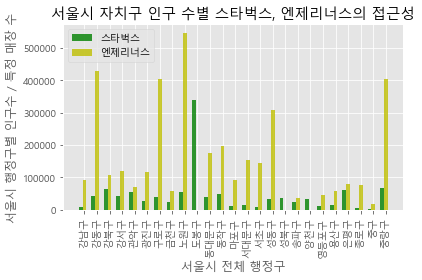

In [197]:
import numpy as np 
import matplotlib.pyplot as plt


n_groups = len(result) 

index = np.arange(n_groups) #x축 수
bar_width = 0.3 # 막대그래프 너비
opacity = 0.8 #글자 색 진하게 지정

#스타벅스 막대그래프 그리기 색깔은 green label 도 설정해주기
rects1 = plt.bar(index, star_a, bar_width,
                 alpha=opacity,
                 color='g',
                 label='스타벅스') 

# 엔제리너스 막대그래프 그리기 색깔은 yellow label로 추가 하였다. 
rects2 = plt.bar(index + bar_width, angel_a, bar_width,
                 alpha=opacity,
                 color='y',
                 label='엔제리너스')

plt.xlabel('서울시 전체 행정구') # x축 label
plt.ylabel('서울시 행정구별 인구수 / 특정 매장 수') # y축 label 
plt.title("서울시 자치구 인구 수별 스타벅스, 엔제리너스의 접근성") #그래프 제목
plt.xticks(index + bar_width, result.index,rotation=90) # x축에 행정구 이름 넣기 
plt.legend()

plt.tight_layout() 
plt.show()

결과 ) 스타벅스는 도봉구가 가장 높고, 엔제리너스는 노원구가 가장 높습니다.      
즉, 도봉구의 스타벅스 매장은 접근성이 다른 지역보다 상대적으로 떨어진다. 
또한, 엔제리너스는 모든 행정구가 스타벅스 접근성보다 상대적으로 다 낮고, 특히 노원구에서의 엔제리너스 매장에 접근성이 가장 낮다.는 것을 그래프를 통해 한 눈에 알 수 있다. 


### 5) 서울시에서 스타벅스매장과 엔제리너스커피 매장이 가장 많은 행정구역은 어디일까요?
 - '행정구별 스타벅스 매장 수 / 서울시 전체 스타벅스 매장 수의 pie 그래프'                 
 - '행정구별 엔제리너스 매장 수 / 서울시 전체 엔제리너스 매장 수의  pie 그래프'             

In [198]:
total

,스타벅스수,엔젤수
구,,
강남구,72,6
중구,58,7
서초구,45,3
종로구,38,2
영등포구,33,8
마포구,32,4
송파구,28,18
서대문구,20,2
용산구,17,4


1. total 데이터 프레임을 이용해 서울시 전체 스타벅스 매장 수, 엔제리너스 매장 수를 구합니다.

In [199]:
total_s=total['스타벅스수'].sum() #서울시 총 스타벅스 수 
total_a=total['엔젤수'].sum() # 서울시 총 엔제리너스 수

2. ratio 함수를 만듭니다.     
ratio("스타벅스")일 때는 각 행정구별 스타벅스 수 나누기 서울시 전체 스타벅스 매장 수 를 하고 ,
ratio("엔제리너스")일 때는 행정구별 엔제리너스 수 나누기 서울시 전체 엔제리너스 매장 수를 하고,         
오름 차순으로 정렬합니다.

In [201]:
def ratio(a):
    if a == '스타벅스':
        a1 =(total['스타벅스수']/total_s).sort_values()
        return a1
    elif a == '엔제리너스':
        a2 =(total['엔젤수']/total_a).sort_values()
        return a2

In [202]:
total_ss =ratio('스타벅스')
total_aa = ratio('엔제리너스')

In [203]:
total_ss

구
도봉구     0.002037
강북구     0.010183
중랑구     0.012220
은평구     0.016293
동작구     0.016293
동대문구    0.018330
성동구     0.018330
관악구     0.018330
구로구     0.020367
노원구     0.020367
강동구     0.020367
금천구     0.020367
성북구     0.024440
광진구     0.026477
강서구     0.028513
양천구     0.028513
용산구     0.034623
서대문구    0.040733
송파구     0.057026
마포구     0.065173
영등포구    0.067210
종로구     0.077393
서초구     0.091650
중구      0.118126
강남구     0.146640
Name: 스타벅스수, dtype: float64

In [204]:
total_aa

구
성북구     0.000000
양천구     0.000000
도봉구     0.000000
중랑구     0.010989
성동구     0.010989
구로구     0.010989
노원구     0.010989
강동구     0.010989
종로구     0.021978
동작구     0.021978
동대문구    0.021978
서대문구    0.021978
광진구     0.032967
강북구     0.032967
서초구     0.032967
금천구     0.043956
용산구     0.043956
마포구     0.043956
강서구     0.054945
은평구     0.065934
강남구     0.065934
중구      0.076923
관악구     0.076923
영등포구    0.087912
송파구     0.197802
Name: 엔젤수, dtype: float64

_오름차순으로 정렬하여 1등과 꼴등의 행정구 이름은 확인할 수 있지만,                      
total_ss와 total_aa의 결과 값이 너무 작으므로 차이는 확인하기 어렵습니다._

따라서, 비율 그래프인 pie그래프를 만들어 한눈에 보기 쉽게 만들어 보겠습니다.

3. pie그래프를 사용하기 위한  class piefunction 만들기!

In [210]:
class piefunction :
    
    def __init__(self,name): #함수를 실행할 때마다 항상 
        self.name = list(name) #total_ss 나 total_aa를 받아서 리스트로 만든다. 
    def pie(self,labels):
            labels = labels.index # 인덱스가 lable이 된다. 

            plt.pie(self.name, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90) 
            plt.tight_layout() #그래프 좀 더 크게 
            
            plt.show()   

__첫 번째로, 서울시 행정구별 스타벅스 매장 수 비율을 알 수 있는 pie 그래프__

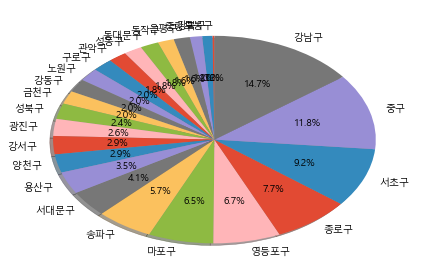

In [211]:
circle = piefunction(total_ss)
circle.pie(total_ss)

   - 강남구가 서울시 스타벅스 매장중 14.7%를 차지하고 있다.       
   그 다음은 중구, 서초구, 종로구가 이를 뒤따른다. 

__다음은, 서울시 행정구별 엔제리너스 매장 수 비율을 알 수 있는 pie 그래프__

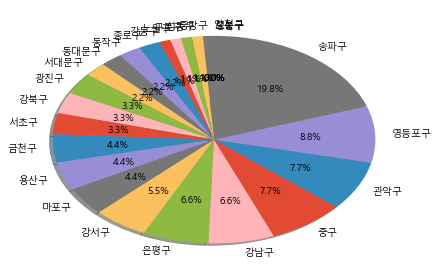

In [212]:
circle = piefunction(total_aa)
circle.pie(total_aa)

 - 엔제리너스 매장은 롯데계열사 매장으로 롯데건물이 많은 송파구에    
 서울시 전체 매장중 19.8% 비율로 엔제리너스 매장이 가장 많이 있다.

### 5) 서울시 행정구별 스타벅스, 엔제리너스 카페 현황
 + 행정구역별 스타벅스 매장 수 비교 막대그래프

In [213]:
total

,스타벅스수,엔젤수
구,,
강남구,72,6
중구,58,7
서초구,45,3
종로구,38,2
영등포구,33,8
마포구,32,4
송파구,28,18
서대문구,20,2
용산구,17,4


1. 행정구별 스타벅스 매장수를 막대그래프로 그릴 수 있는 plot_bar_star 함수를 만듭니다.

In [215]:
def plot_bar_star():
    
    index = np.arange(len(total)) #막대의 수를 가져오기 위해 
    plt.bar(index, total['스타벅스수'],color = 'g') #색은 green 
    plt.xlabel("서울시 '구'", fontsize=10) # x축 label
    plt.ylabel('SUM', fontsize=10) # y축 label
    plt.xticks(index, total.index, fontsize=10, rotation=90) # x축의 값들 rotation=90 글자 세로로 
    plt.title('서울시 행정구별 스타벅스 매장 수') # 제목
    plt.show()

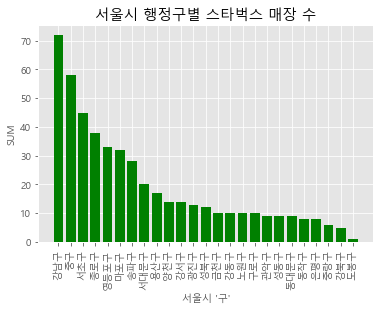

In [216]:
plot_bar_star()

 - 행정구역별 엔제리너스 매장 수 비교 막대그래프 

1. 행정구별 엔제리너스 매장 수를 막대그래프로 그릴 수 있는 plot_bar_angel 함수를 만듭니다

In [217]:
def plot_bar_angel():
    
    a=total.sort_values(by ='엔젤수',ascending=False)
    index = np.arange(len(a))
    plt.bar(index, a['엔젤수'],color = 'y')
    plt.xlabel("서울시 '구'", fontsize=10)
    plt.ylabel('SUM', fontsize=10)
    plt.xticks(index, a.index, fontsize=10, rotation=90)
    plt.title('서울시 구별 엔제니러스 매장 수')
    plt.show()

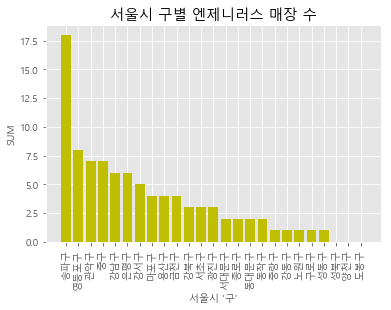

In [219]:
plot_bar_angel()

 + 송파구에 앞도적으로 매장 수가 많고, 성복구,양천구, 도봉구에는 엔제리너스 매장이 없는 것을 확인할 수 있습니다.

### 6) 행정구별 엔젤 매장 수, 스벅 매장 수 비교 이중 막대그래프

 - 이제는 이중 막대그래프를 그려 행정구별 스타벅스와 엔제리너스 매장 수를 한눈에 비교 할 수 있는 그래프를 만들겠습니다.

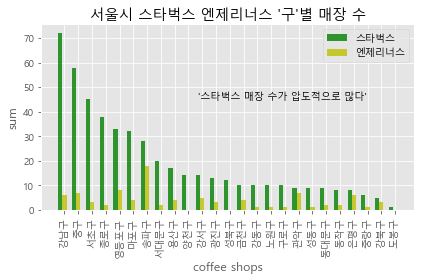

In [220]:
import numpy as np
import matplotlib.pyplot as plt


n_groups = len(total)

index = np.arange(n_groups) #x축
bar_width = 0.3
opacity = 0.8


rects1 = plt.bar(index, total['스타벅스수'], bar_width,
                 alpha=opacity,
                 color='g',
                 label='스타벅스')

rects2 = plt.bar(index + bar_width, total['엔젤수'], bar_width,
                 alpha=opacity,
                 color='y',
                 label='엔제리너스')

plt.xlabel('coffee shops')
plt.ylabel('sum')
plt.title("서울시 스타벅스 엔제리너스 '구'별 매장 수")
plt.text(10, 45, r"'스타벅스 매장 수가 압도적으로 많다'")
plt.xticks(index + bar_width, total.index,rotation=90)
plt.legend()

plt.tight_layout()
plt.show()